# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
unit = 'metric'
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={unit}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | st. john's
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | kishanganj
Processing Record 6 of Set 1 | huicheng
Processing Record 7 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | mata-utu
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | yerofey pavlovich
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | aasiaat
Processing Record 16 of Set 1 | uturoa
Processing Record 17 of Set 1 | tazacorte
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | mirny
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | toliara

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,-6.43,74,100,5.69,SJ,1712779143
1,st. john's,47.5649,-52.7093,1.27,73,100,5.66,CA,1712778947
2,west island,-12.1568,96.8225,25.99,78,40,3.09,CC,1712779144
3,iqaluit,63.7506,-68.5145,-1.15,68,20,2.06,CA,1712779145
4,kishanganj,26.1167,87.9333,24.92,30,0,3.74,IN,1712779146


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-6.43,74,100,5.69,SJ,1712779143
1,st. john's,47.5649,-52.7093,1.27,73,100,5.66,CA,1712778947
2,west island,-12.1568,96.8225,25.99,78,40,3.09,CC,1712779144
3,iqaluit,63.7506,-68.5145,-1.15,68,20,2.06,CA,1712779145
4,kishanganj,26.1167,87.9333,24.92,30,0,3.74,IN,1712779146


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

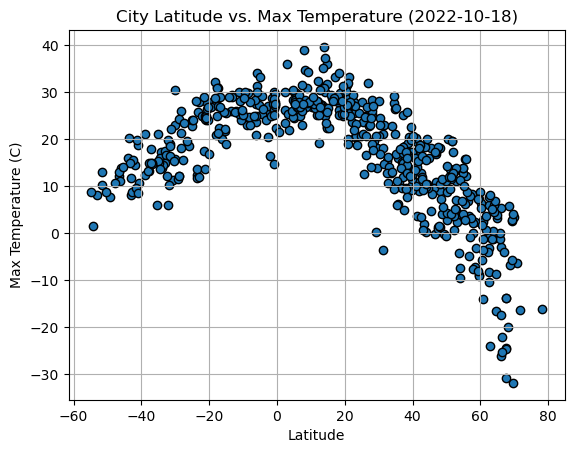

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='tab:blue', edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

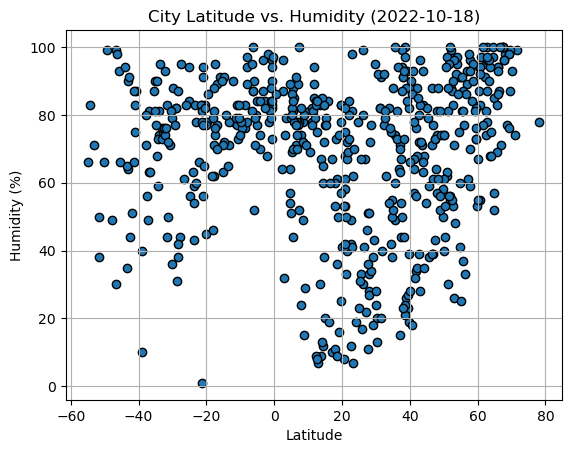

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', facecolors='tab:blue', edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

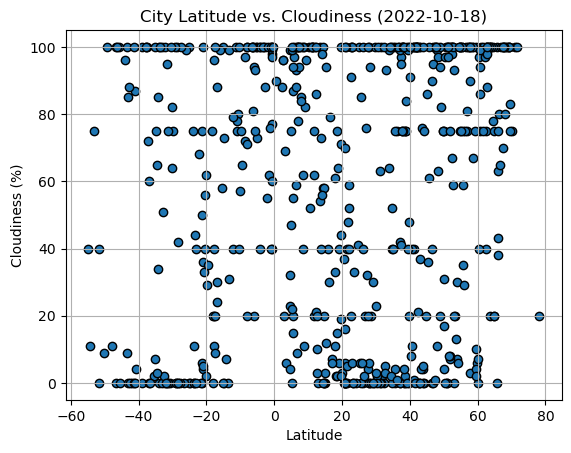

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', facecolors='tab:blue', edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

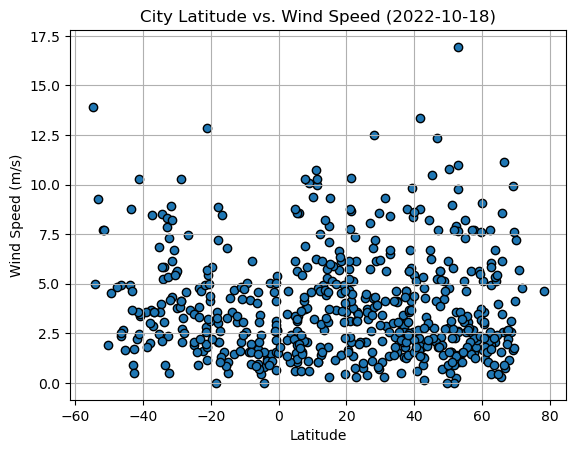

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', facecolors='tab:blue', edgecolors='k')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values,y_values):
    # Perform a linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Create Plot
    plt.scatter(x_values,y_values, c='tab:blue')
    plt.plot(x_values,regress_values,"r-")

    # Plot Labels and Annotate the line equation
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.annotate(line_eq,(x_values.max()-20, y_values.max()),fontsize=10,color="red")

    # Show Plot
    plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-6.43,74,100,5.69,SJ,1712779143
1,st. john's,47.5649,-52.7093,1.27,73,100,5.66,CA,1712778947
3,iqaluit,63.7506,-68.5145,-1.15,68,20,2.06,CA,1712779145
4,kishanganj,26.1167,87.9333,24.92,30,0,3.74,IN,1712779146
5,huicheng,23.0385,116.2899,20.42,81,100,3.58,CN,1712779146


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,west island,-12.1568,96.8225,25.99,78,40,3.09,CC,1712779144
6,lebu,-37.6167,-73.6500,14.96,56,100,3.68,CL,1712779082
7,blackmans bay,-43.0167,147.3167,8.07,90,85,0.89,AU,1712779148
8,mata-utu,-13.2816,-176.1745,29.36,78,31,4.70,WF,1712779149
11,puerto natales,-51.7236,-72.4875,10.25,50,40,7.72,CL,1712779151


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7292653298262829


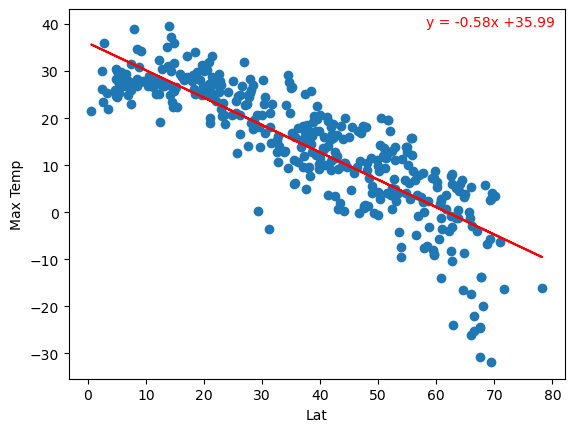

In [40]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

The r-value is: 0.591999824185089


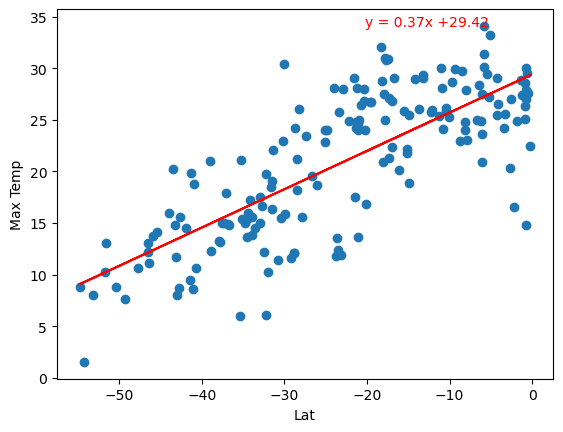

In [41]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** Looking at the two graphs and regression lines, one can see that when the latitude increases in the northern hemisphere, the temperature decreases whereas for the southern hemisphere, the temperature increases. This can be attributed to the fact that the Latitude of 0 is the equator. Values that fall near or on the equator (Lat = 0) will show higher maximum temperatures. For the northern hemisphere, the latitude increases going closer to the north pole, decreasing in temperature. For the southern hemisphere, going away from the equator will show it as a negative value, therefore making the graph flipped with the lowest number in the negatives with low max temperatures. Looking at the r-values as well, we can see that there is a strong correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0826317800910678


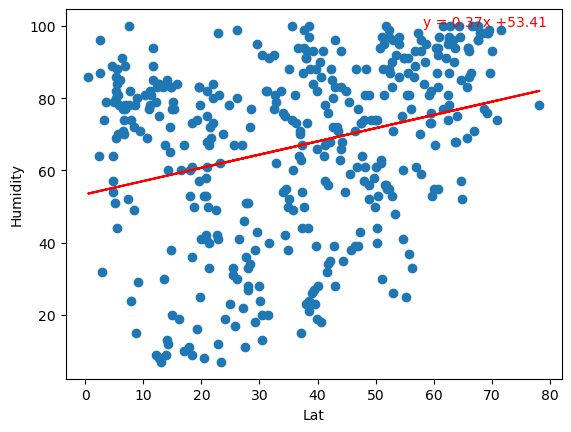

In [44]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

The r-value is: 0.09149078084945153


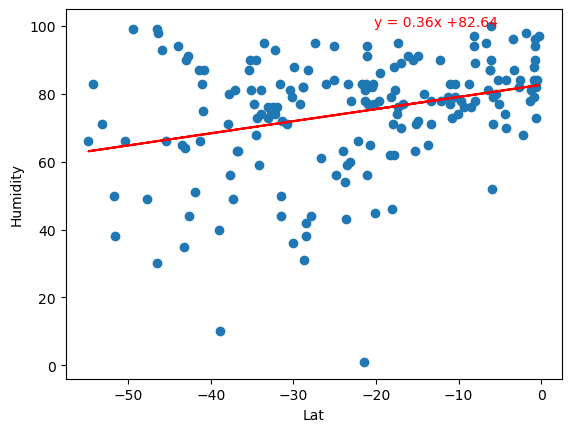

In [45]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** Looking at the graphs alone, we can see the regression line increase for both hemispheres. However, when looking at both r-values, they both are small values close to zero, showing us statistically that there is a weak correlation between humidity and latitude. This can also be seen by the graph and how far away the scatter plot points are from the regression line.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.030472613751603195


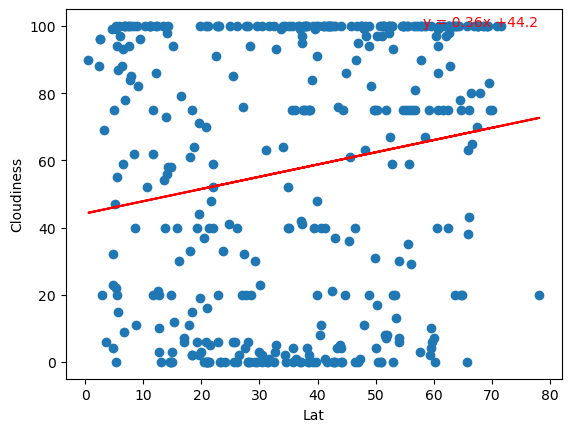

In [47]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

The r-value is: 0.08676169982433846


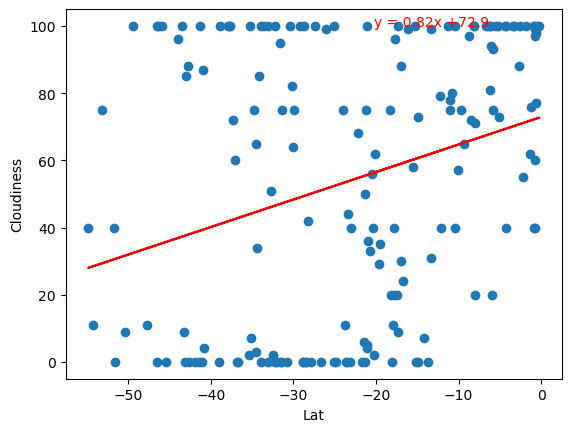

In [46]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** Looking at both graphs, there seems to be little to no relation between cloudiness and latitude. In fact, majority of points either lie around 0 or 100 with all other points scattered in between, none close to the regression line. This may be attributed to how cloudiness is recorded where many of the times it is either cloudy (Cloudiness = 100) or not (Cloudiness = 0).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0025141936273369385


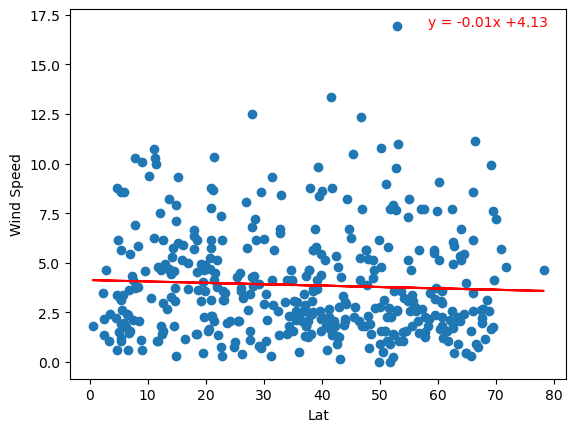

In [48]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

The r-value is: 0.1263802536968686


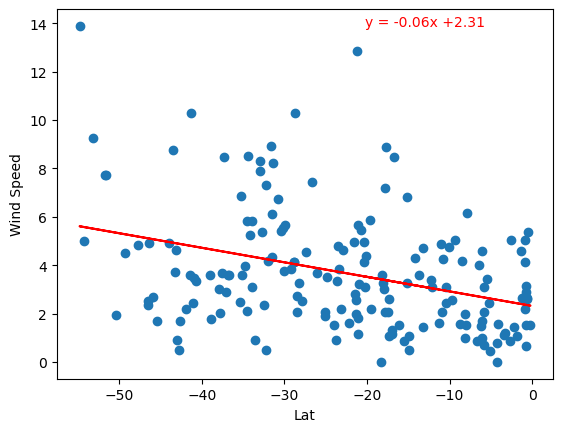

In [49]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** For the northern hemisphere, regardless of the latitude, the wind speed tends to be low, falling majority of the time below wind speed = 5.0. The r-value however shows a very small number, close to 0, concluding that the relation between wind speed and latitude is very weak. For the southern hemisphere, the r-value is slightly larger and can also be seen when looking at the graph. The data tends downwards, where the wind speed decreases closer the equator (Lat = 0). The correlation however is still considered weak statistically. 